## Description and Goal of the Project.

### Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

### Read And Analyzing The Dataset

In [2]:
data1 = pd.read_csv("C:/Internship/diabetes.csv")

In [3]:
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data Exploration : 

In [4]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Number of rows and columns in this dataset

In [6]:
data1.shape

(768, 9)

#### Getting the statistical measures of the dataset.

In [7]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data1.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
data1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
Description=data1.describe().T

In [12]:
Description

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Observations:

## Data Visualization 

#### Box Plots of Diagnostic Features for Diabetes Prediction.

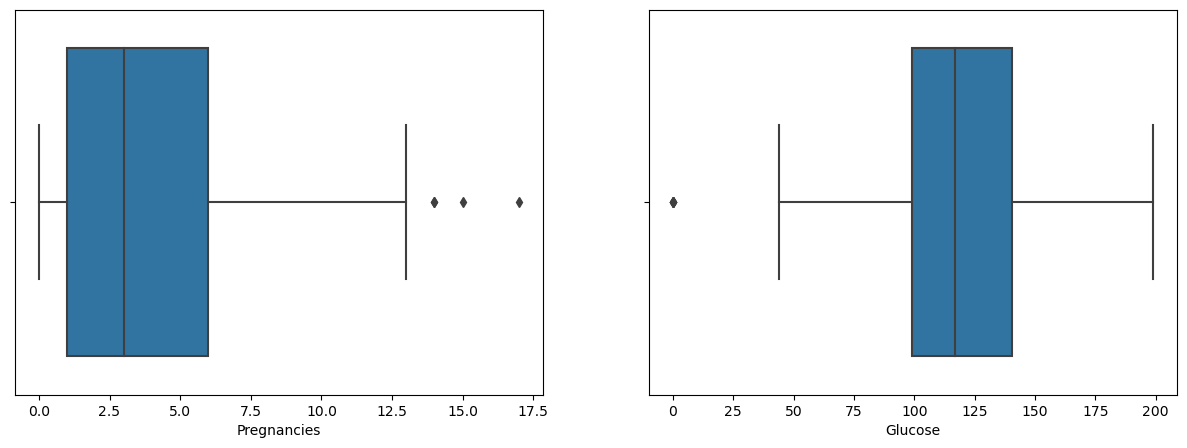

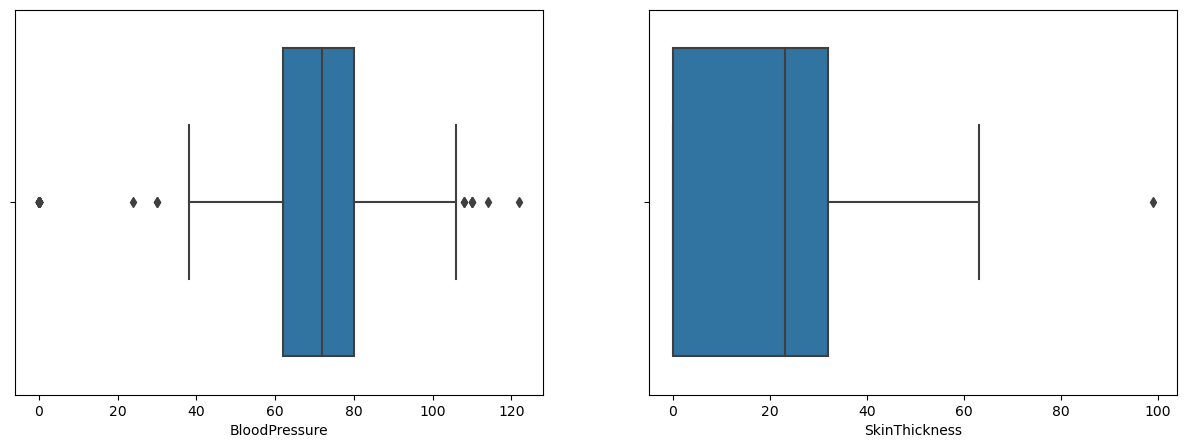

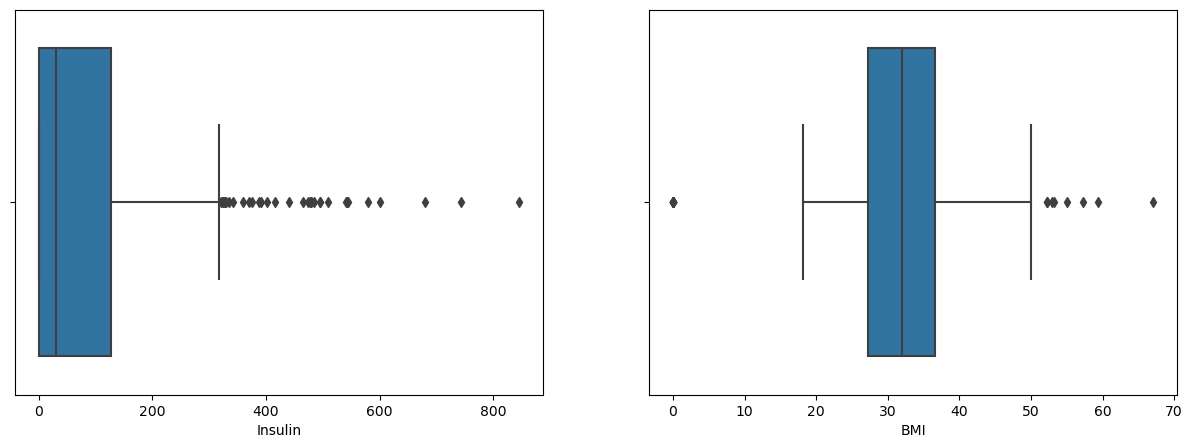

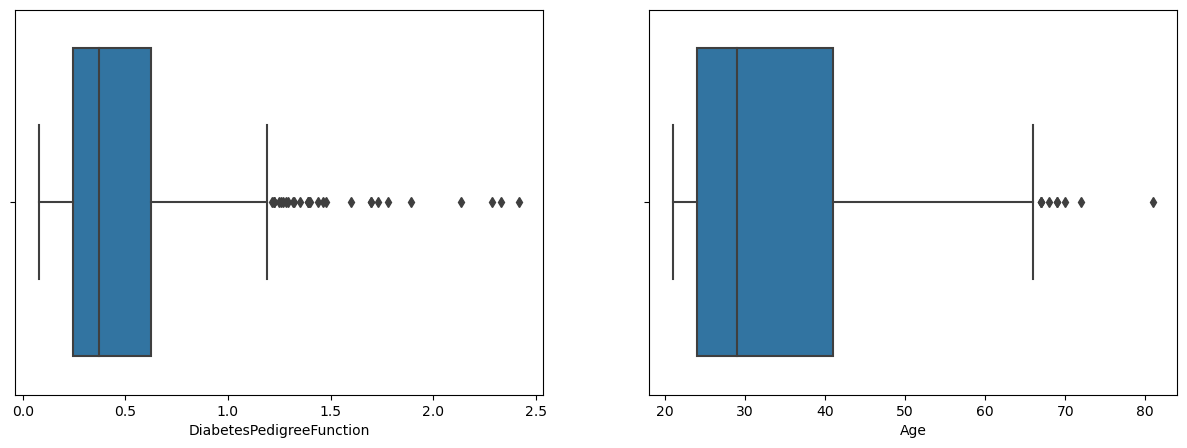

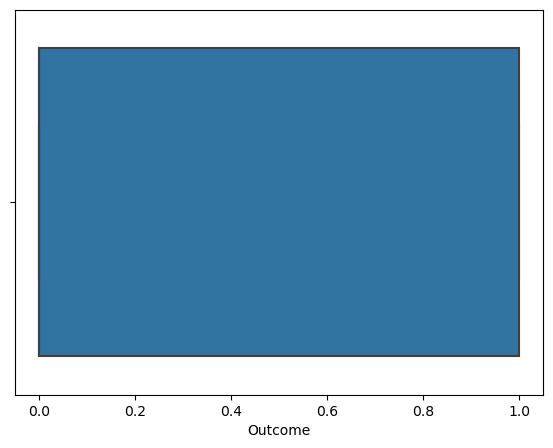

In [13]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

for i in range(0, len(features), 2):
    fig = plt.figure(figsize=(15,5)) 
    plt.subplot(1,2,1)
    sns.boxplot(x=features[i], data=data1)
    
    if i+1 < len(features):
        plt.subplot(1,2,2)
        sns.boxplot(x=features[i+1], data=data1)
    
    plt.show()

#### Histogram and density graphs of all variables were accessed.

C:\Users\sharm\AppData\Local\Temp\ipykernel_3184\3319563759.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Age'], bins = 20, ax=ax[0,0])
C:\Users\sharm\AppData\Local\Temp\ipykernel_3184\3319563759.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Pregnancies'], bins = 20, ax

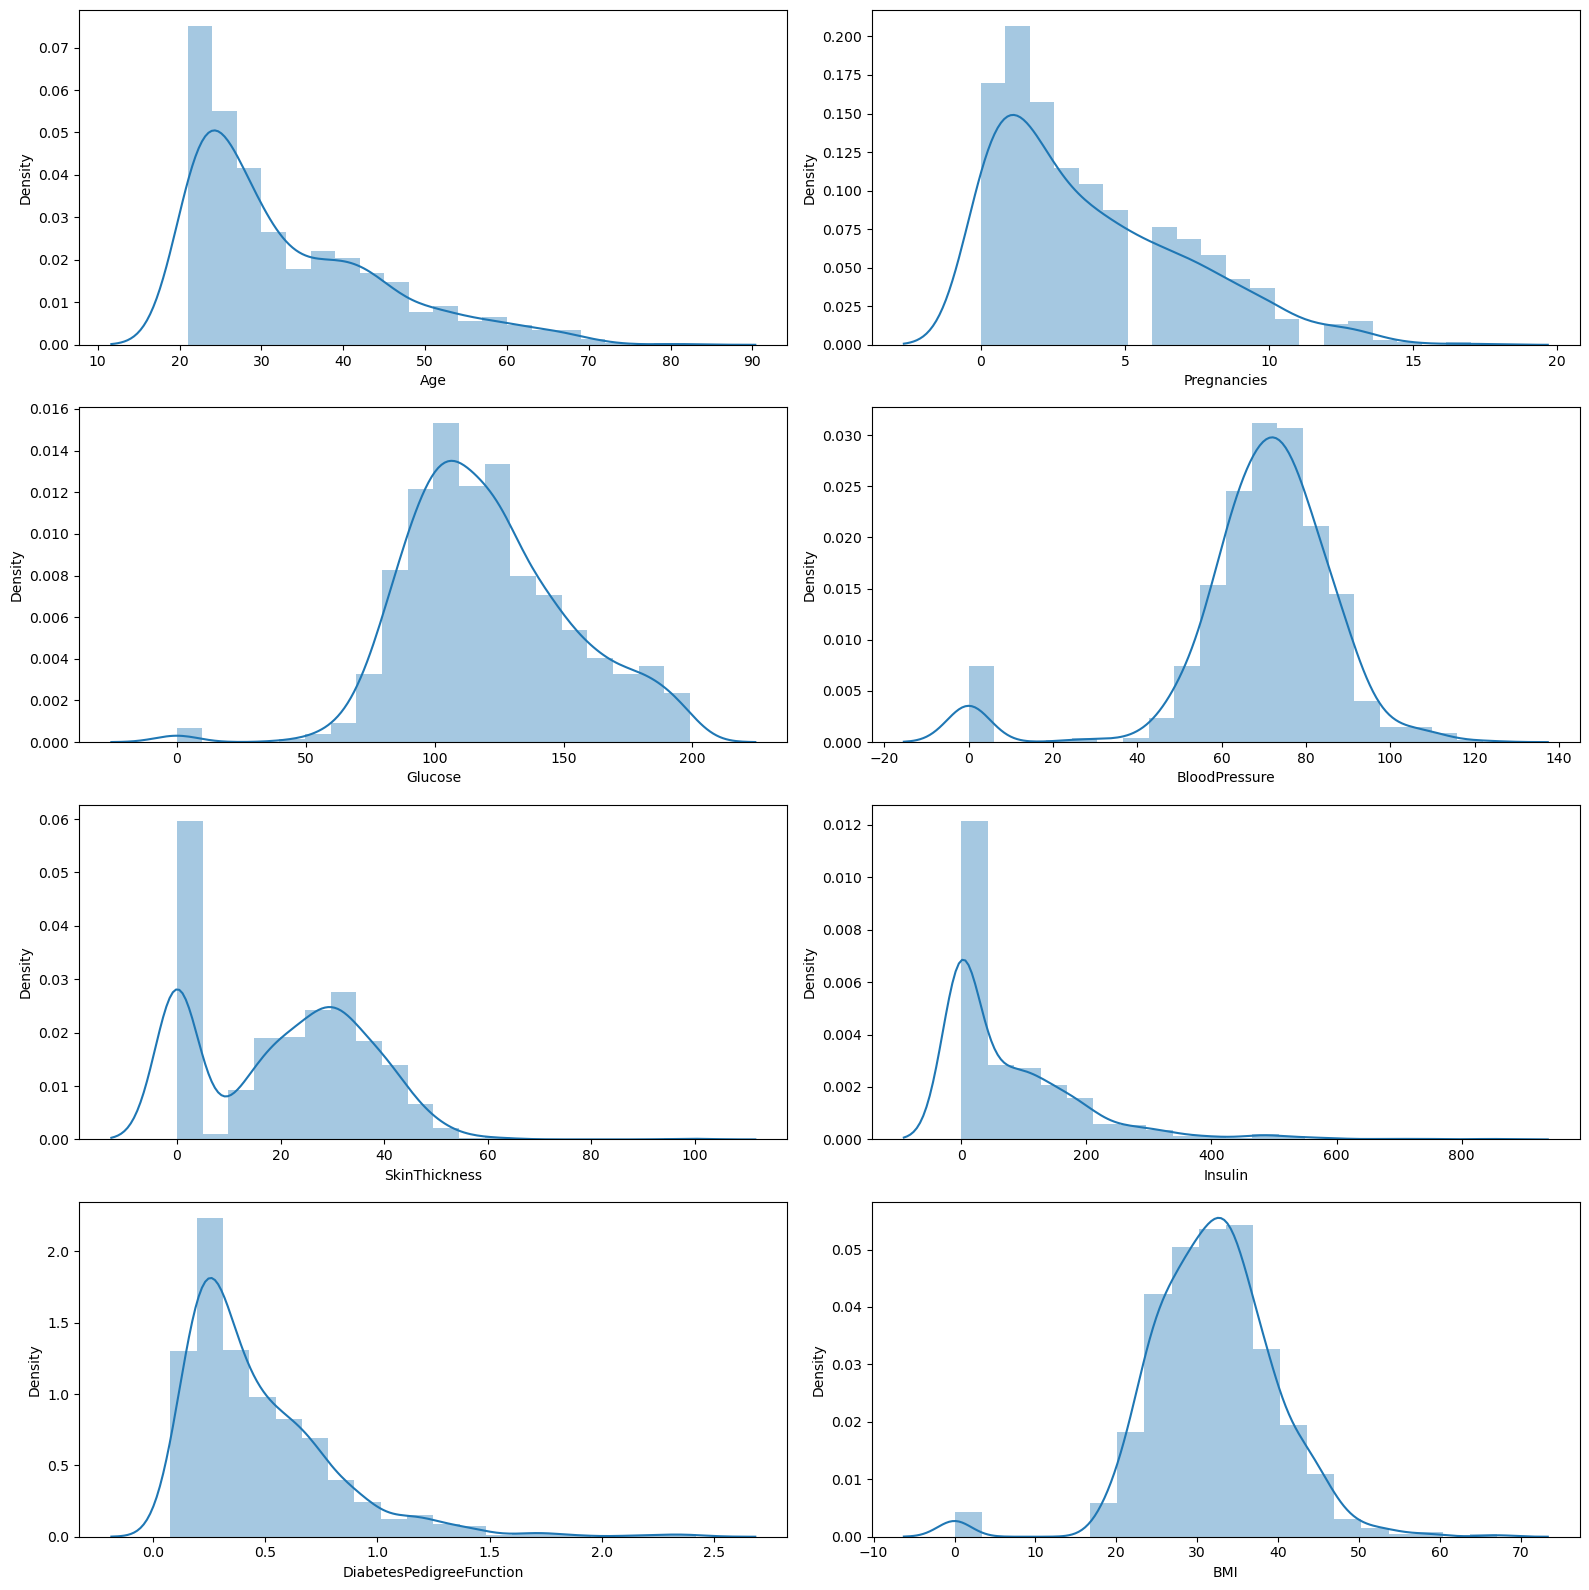

In [14]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data1['Age'], bins = 20, ax=ax[0,0]) 
sns.distplot(data1['Pregnancies'], bins = 20, ax=ax[0,1]) 
sns.distplot(data1['Glucose'], bins = 20, ax=ax[1,0]) 
sns.distplot(data1['BloodPressure'], bins = 20, ax=ax[1,1]) 
sns.distplot(data1['SkinThickness'], bins = 20, ax=ax[2,0])
sns.distplot(data1['Insulin'], bins = 20, ax=ax[2,1])
sns.distplot(data1['DiabetesPedigreeFunction'], bins = 20, ax=ax[3,0]) 
sns.distplot(data1['BMI'], bins = 20, ax=ax[3,1])
plt.tight_layout()
plt.show()


#### Pair Plot of Diagnostic Measurements Segregated by Diabetes Outcome

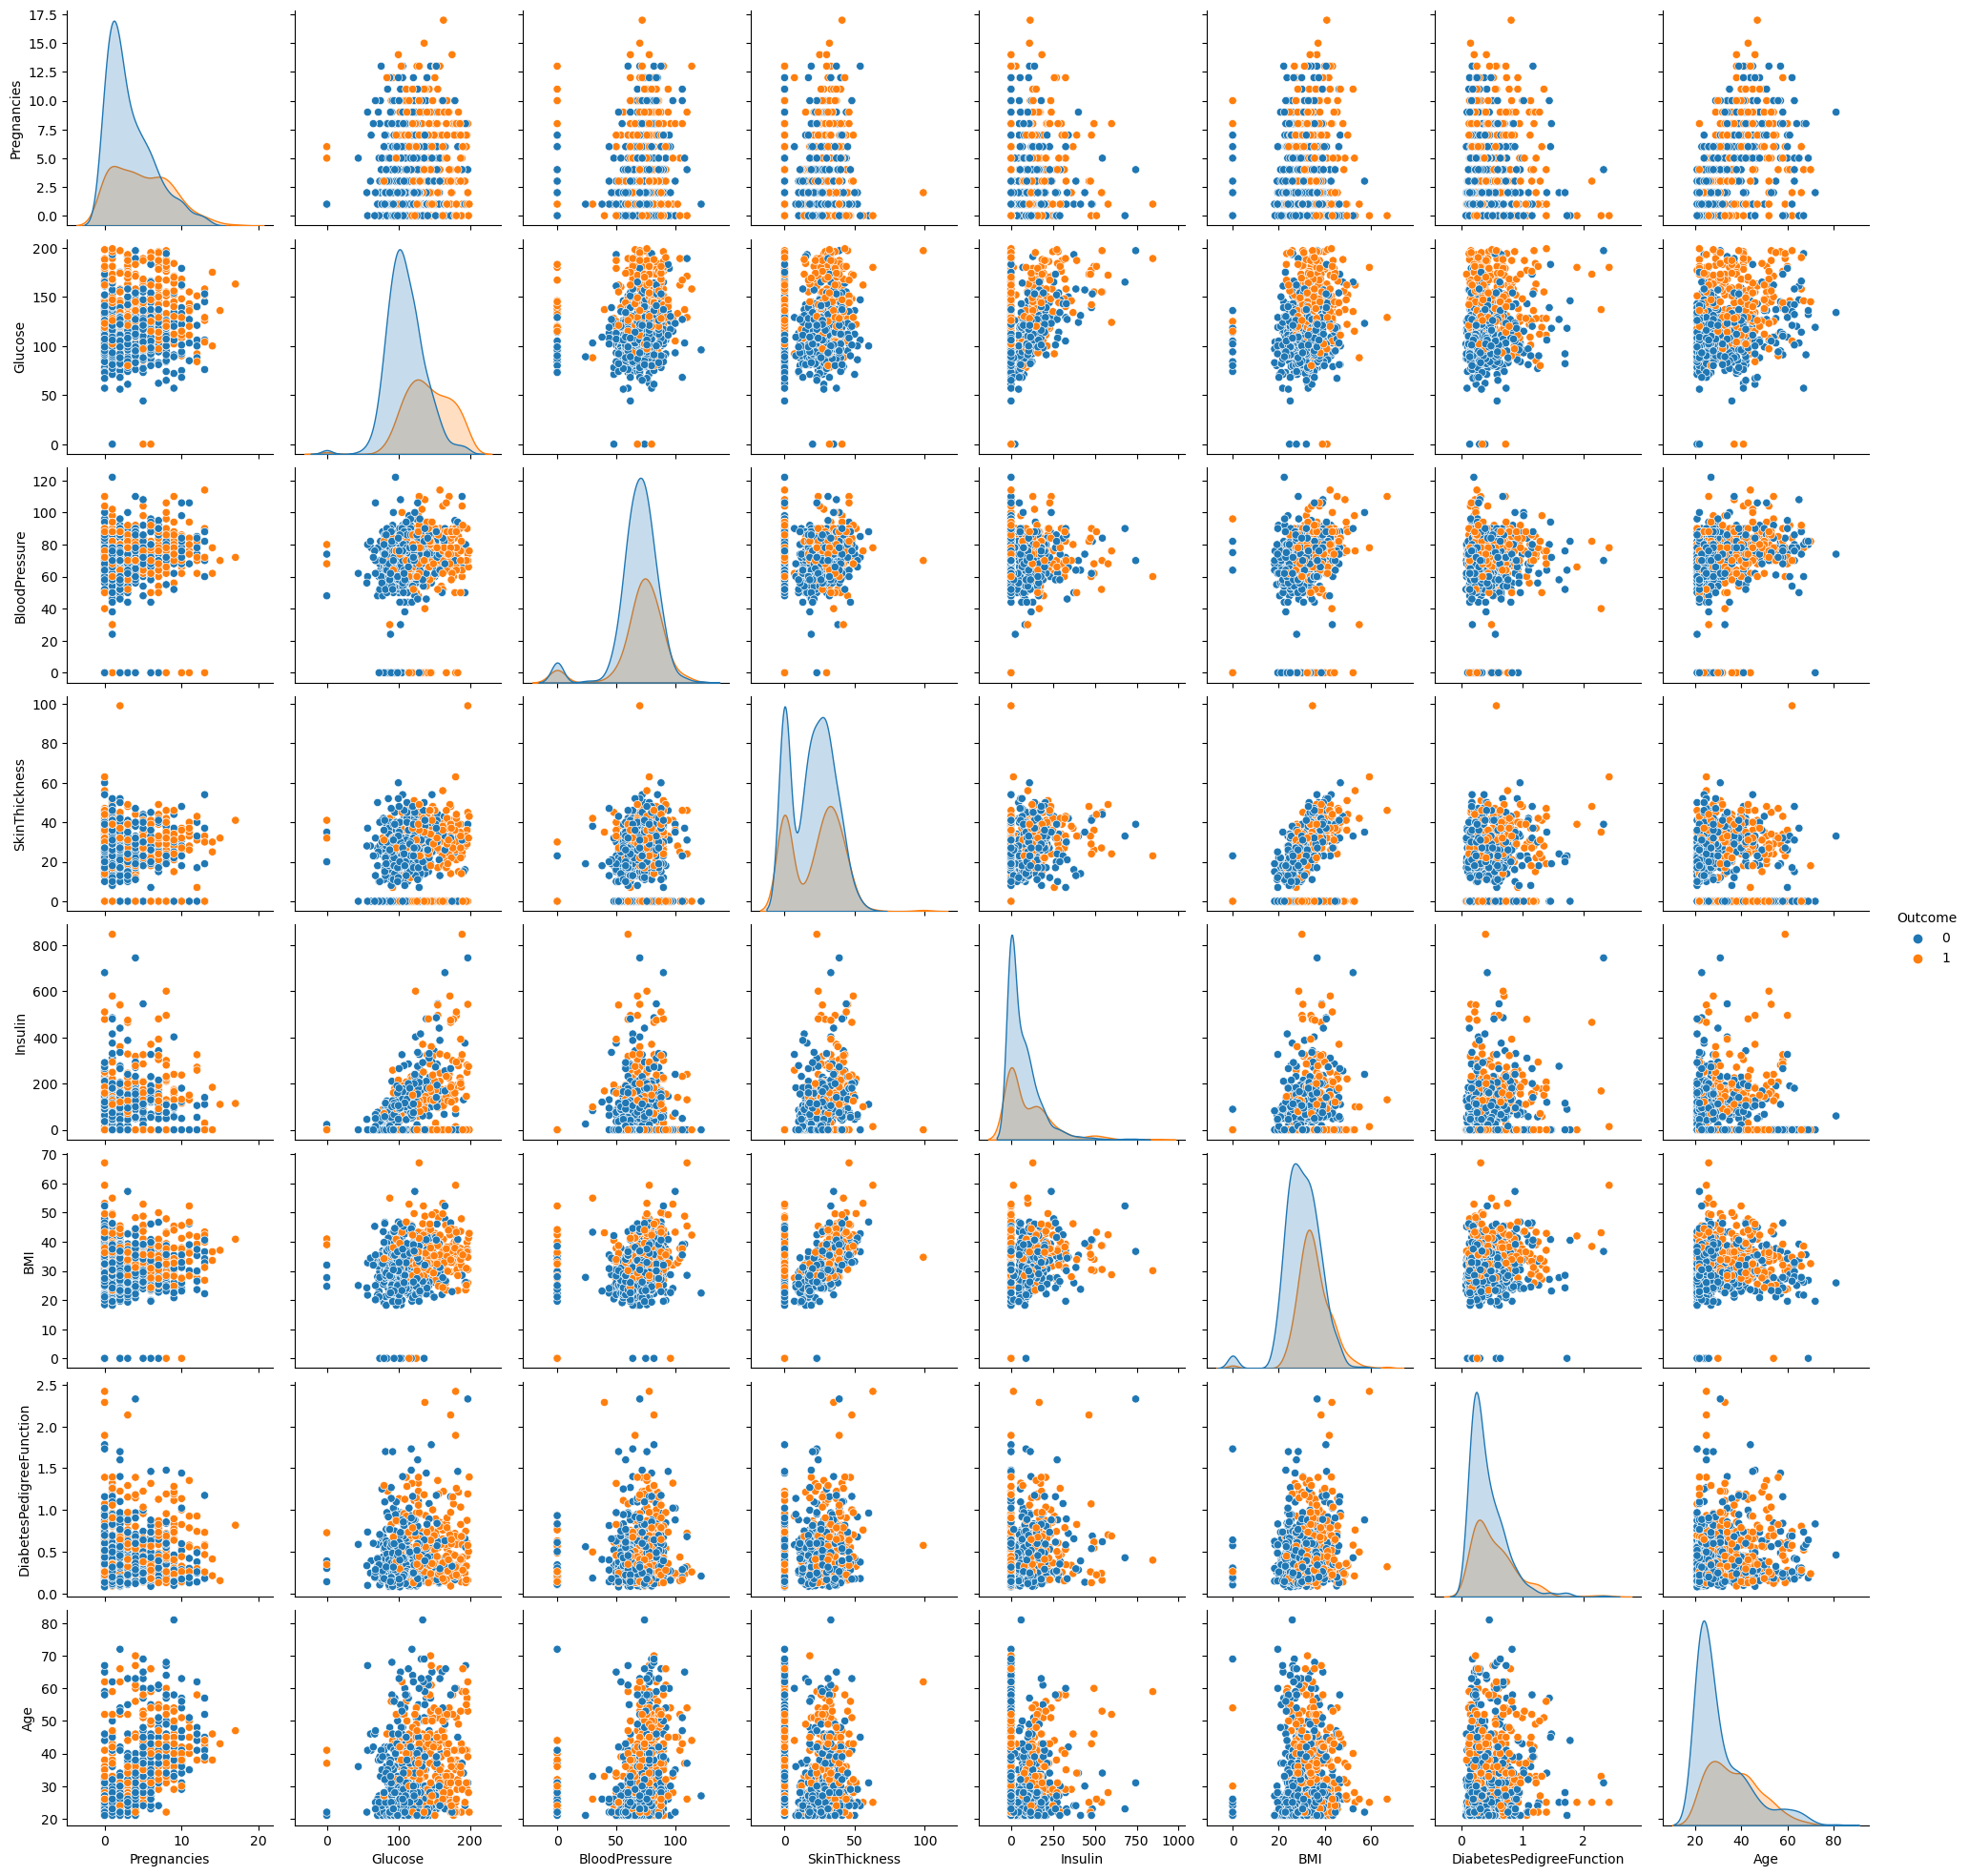

In [15]:
sns.pairplot(data = data1, hue = 'Outcome')
plt.show()

#### Histograms of Diagnostic Features for Diabetes Prediction.

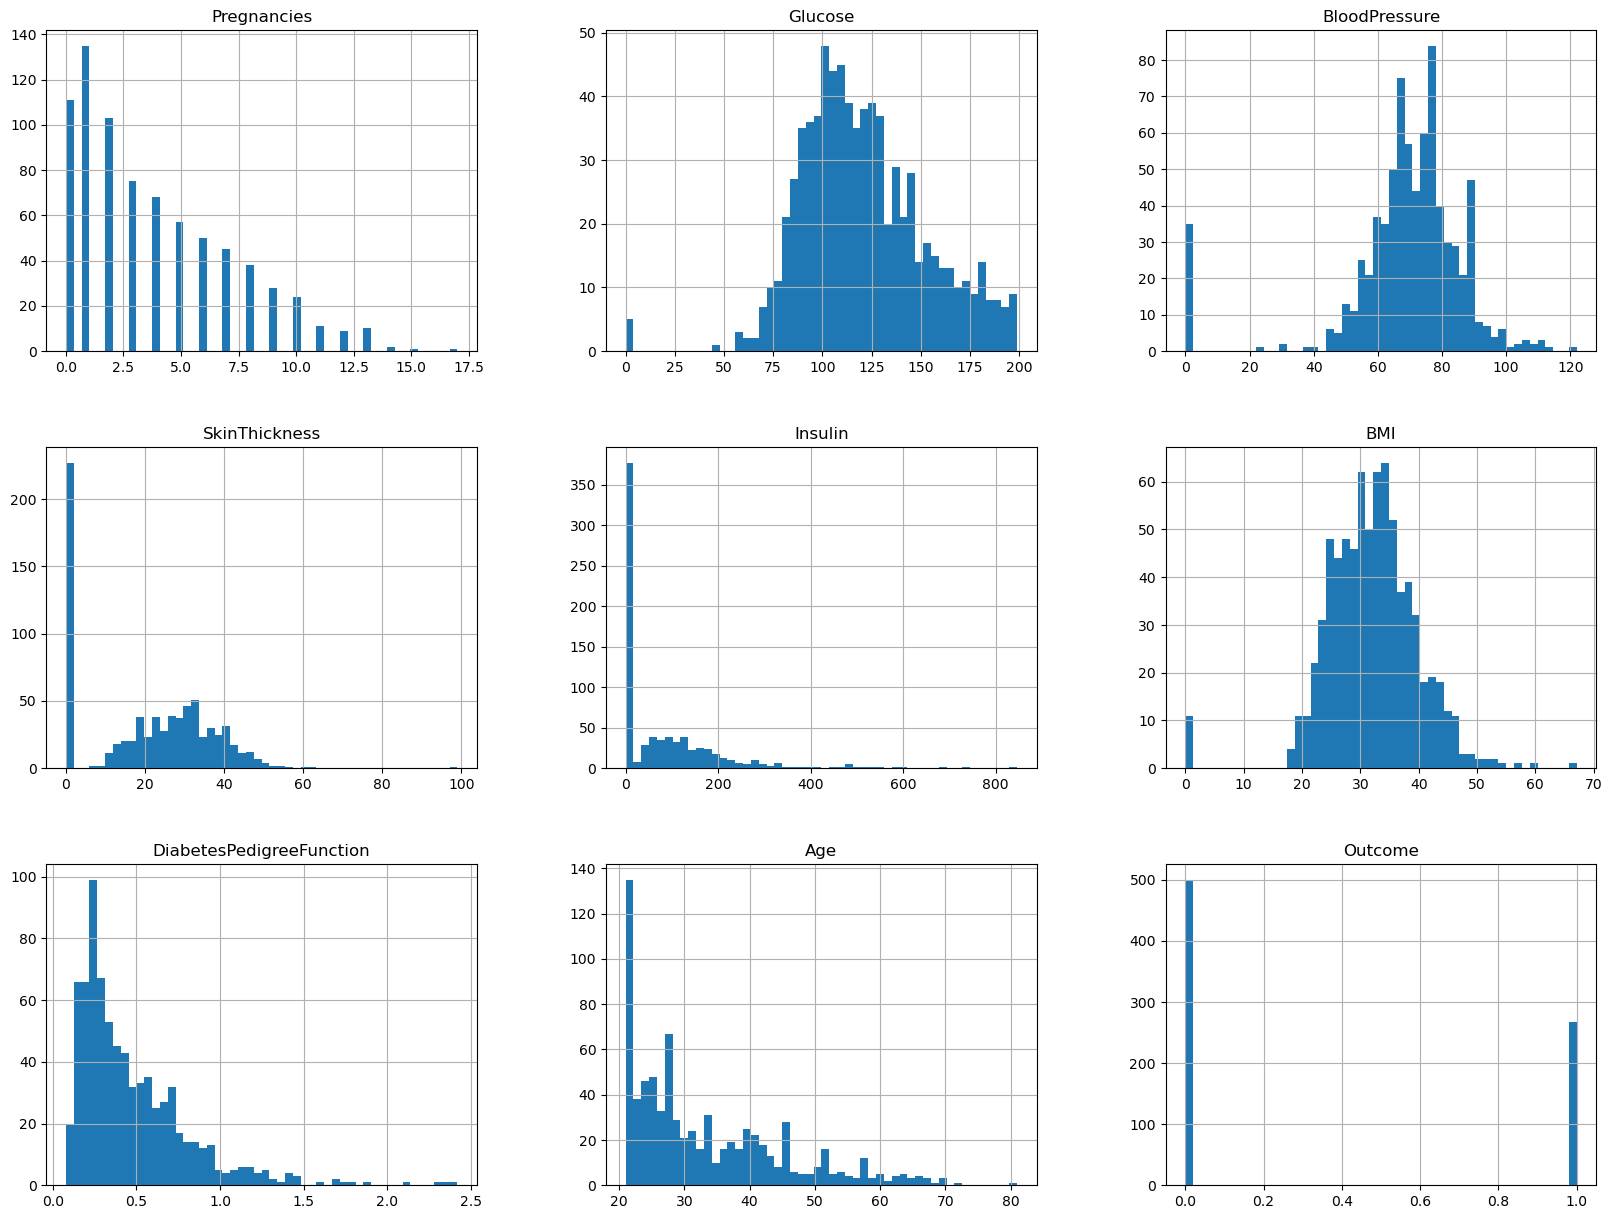

In [16]:
data1.hist(bins=50, figsize=(20,15))
plt.show()

#### Heatmap of Correlation Between Diagnostic Features for Diabetes Prediction.

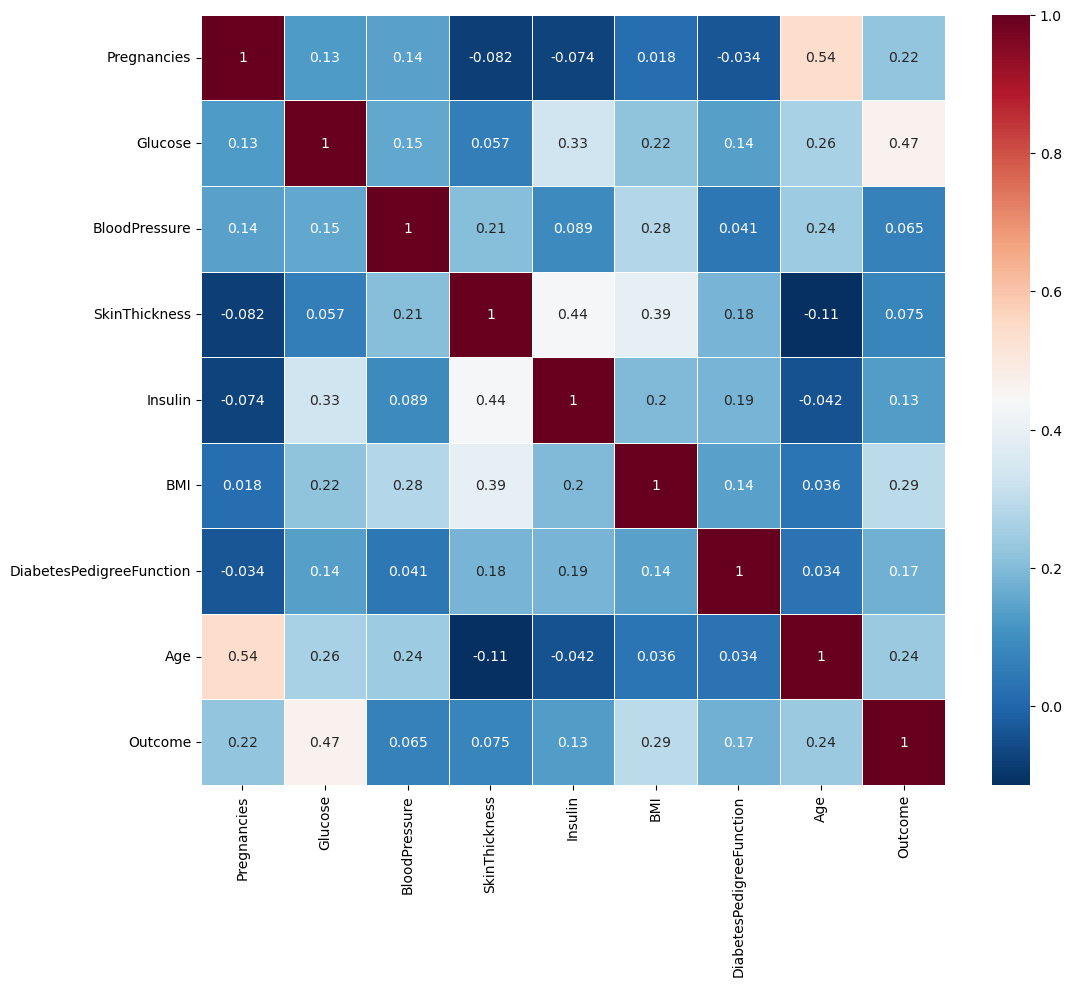

In [17]:
fig, ax = plt.subplots(figsize = (12,10))
ax= sns.heatmap(data1.corr(), cmap = 'RdBu_r', cbar=True, annot=True, linewidths=0.5, ax=ax)
plt.show()

#### Heatmap of Descriptive Statistics for Diagnostic Features.

In [18]:
data2=pd.DataFrame(index=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'],columns=["count","mean","std","min","25%","50%","75%","max"], data=Description)

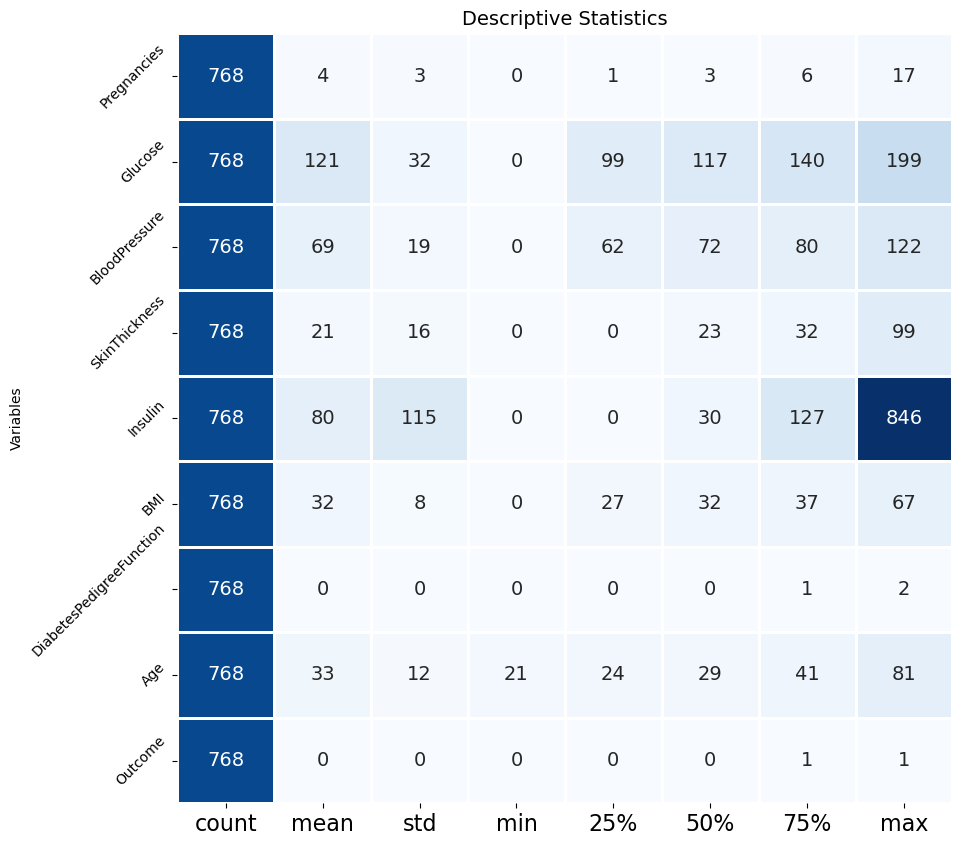

In [19]:
f, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data2, annot=True, cmap="Blues", fmt='.0f', ax=ax, linewidths=2, cbar=False, annot_kws={"size":14}) 
plt.xticks(size=16) 
plt.yticks(size=10, rotation=45) 
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size=14) 
plt.show()

In [20]:
data1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [21]:
data1.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [22]:
data1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Outcomes of the Graphs:

#### Mean value of all diabetic and non-diabetic people.  

In [23]:
data1.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Data Preprocessing :

#### Replace zero values with NaN

In [24]:
data1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

#### Fill missing values with mean column values

In [25]:
imputer = SimpleImputer(strategy='mean')
data_filled = pd.DataFrame(imputer.fit_transform(data1))
data_filled.columns = data1.columns
data_filled.index = data1.index

In [26]:
data_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


In [27]:
data_filled.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
data_filled.index

RangeIndex(start=0, stop=768, step=1)

#### Split the dataset into features and target variable

In [29]:
X = data_filled.drop('Outcome', axis=1)
y = data_filled['Outcome']

In [30]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0


In [31]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

### Model Building

#### Split the dataset into training set and test set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

### Standardize the features

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
print(X_train)

[[-0.25302694 -0.03522271 -1.7268986  ...  0.50182847 -1.04770342
  -0.70029649]
 [ 1.21817138  1.76684117  1.50325118 ...  0.16925401 -0.0250328
   2.13474996]
 [-0.84150628 -0.33010589  0.65321176 ...  0.32831136 -0.77699649
  -0.78620699]
 ...
 [-0.54726661  1.14431002  0.14318811 ...  0.99346028 -1.02664843
  -0.270744  ]
 [-1.13574594  0.19413088 -0.36683554 ... -0.29345828  2.754225
  -0.70029649]
 [-0.84150628  1.89790036  0.00762248 ...  1.55739088 -0.58148593
   0.67427148]]


In [35]:
print(X_test)

[[ 0.04121272 -0.75604826 -0.02681977 ... -1.00198647 -0.54539167
  -0.44256499]
 [-0.84150628  0.68560285  0.14318811 ... -0.91522792 -0.65969015
  -1.04393848]
 [-0.84150628 -1.08369624  0.313196   ... -0.19223996 -0.85219286
  -0.87211749]
 ...
 [-0.84150628 -0.52669467 -0.19682765 ...  0.24155281 -1.0025856
  -0.95802798]
 [-0.25302694  1.60301718 -0.02681977 ...  0.11141498 -0.83113787
  -0.78620699]
 [-1.13574594  0.09583648  2.01327483 ... -1.450239   -0.64164302
  -1.04393848]]


In [36]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training the model

### Support Vector Classifier Algorithm.

In [37]:
model = svm.SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Set up the RandomizedSearchCV object 
random_search = RandomizedSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=10), n_iter=25, random_state=1)


# Fit the model to the training data and find the best parameters
random_search.fit(X_train, y_train)


# Make predictions on the test set using the best model
y_pred = random_search.best_estimator_.predict(X_test)

#### Evaluate the Accuracy of the model

In [38]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.7662337662337663
Confusion Matrix: [[92  8]
 [28 26]]


#### Ensemble method: Bagging

In [39]:
bagging = BaggingClassifier(random_search.best_estimator_, max_samples=1.0, max_features=1.0)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

In [40]:
print('Bagging Accuracy:', accuracy_score(y_test, y_pred_bagging))
print('Bagging Confusion Matrix:', confusion_matrix(y_test, y_pred_bagging))

Bagging Accuracy: 0.7532467532467533
Bagging Confusion Matrix: [[90 10]
 [28 26]]


### Logistic Regression Algorithm

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.7597402597402597


### K nearest neighbors Algorithm.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

C:\Users\sharm\AppData\Local\Temp\ipykernel_3184\2250603127.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acc = pd.Series()
C:\Users\sharm\AppData\Local\Temp\ipykernel_3184\2250603127.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc = acc.append(pd.Series(accuracy))
C:\Users\sharm\AppData\Local\Temp\ipykernel_3184\2250603127.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc = acc.append(pd.Series(accuracy))
C:\Users\sharm\AppData\Local\Temp\ipykernel_3184\2250603127.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc = acc.append(pd.Series(accuracy))
C:\Users\sharm\AppData\Local\T

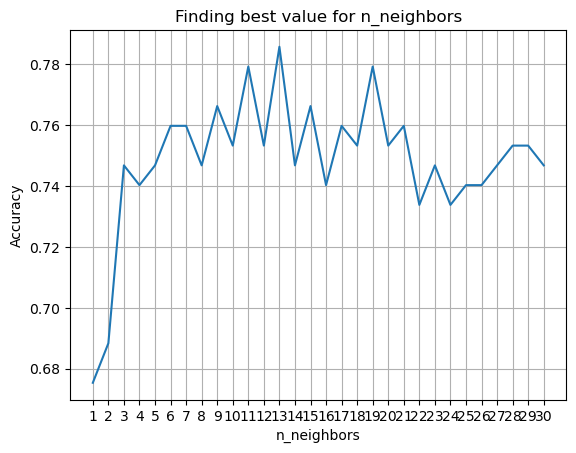

Highest accuracy achieved:  0.7857142857142857


In [56]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

best_k = 1
best_accuracy = 0

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    accuracy = metrics.accuracy_score(prediction, y_test)
    acc = acc.append(pd.Series(accuracy))  
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = i

plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest accuracy achieved: ',acc.values.max())

In [45]:
print('Highest accuracy achieved with k =', best_k, ':', best_accuracy)

Highest accuracy achieved with k = 13 : 0.7857142857142857


### Random forest Algorithm.

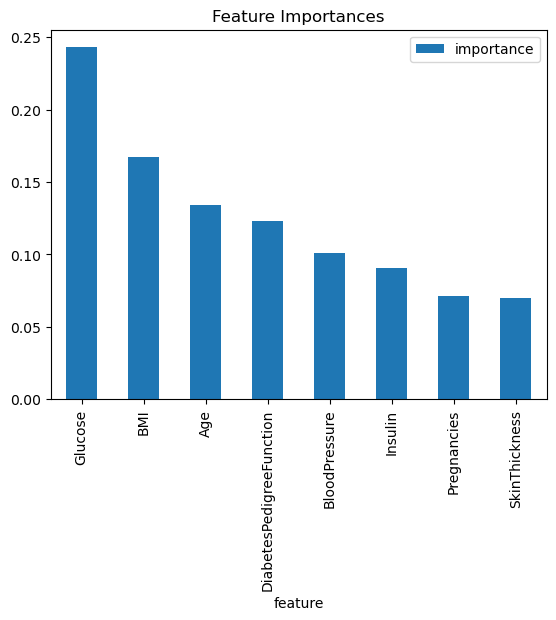

Random Forest: 71.42857142857143


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(ranfor.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar()
plt.title("Feature Importances")
plt.show()

# Make predictions and calculate accuracy
Y_pred_ranfor = ranfor.predict(X_test)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)
print("Random Forest: " + str(accuracy_ranfor * 100))

## Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[90, 10],
       [31, 23]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81       100
         1.0       0.70      0.43      0.53        54

    accuracy                           0.73       154
   macro avg       0.72      0.66      0.67       154
weighted avg       0.73      0.73      0.71       154



In [58]:
def predict_diabetes(model):
    pregnancies = float(input("Enter the number of pregnancies: "))
    glucose = float(input("Enter the glucose level: "))
    blood_pressure = float(input("Enter the blood pressure: "))
    skin_thickness = float(input("Enter the skin thickness: "))
    insulin = float(input("Enter the insulin level: "))
    bmi = float(input("Enter the BMI: "))
    diabetes_pedigree_function = float(input("Enter the Diabetes Pedigree Function: "))
    age = float(input("Enter the age: "))

    # Create a numpy array from the user input
    input_data = np.array([pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age])

    # Preprocess input_data here
    # Rescale the data
    input_data = sc.transform(input_data.reshape(1, -1))

    # Use the model to make predictions
    prediction = model.predict(input_data)

    # Return the prediction
    return prediction

# Use the trained model to make a prediction
prediction = predict_diabetes(knn_model)

# Print the prediction
if prediction[0] == 1:
    print("The model predicts that the patient has diabetes.")
else:
    print("The model predicts that the patient does not have diabetes.")


Enter the number of pregnancies: 6
Enter the glucose level: 148
Enter the blood pressure: 72
Enter the skin thickness: 35
Enter the insulin level: 0
Enter the BMI: 33.6
Enter the Diabetes Pedigree Function: 0.627
Enter the age: 50
The model predicts that the patient does not have diabetes.


C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
